# Final classification with Gradient Boosting
### This file contains the training and testing of Gradient Boosting with and without fusion

## Without fusion

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics

In [2]:
df = pd.read_excel("cnn.xlsx")

In [3]:
col_names = df.columns

col_names

Index([       1,        2,        3,        4,        5,        6,        7,
              8,        9,       10,       11,       12,       13,       14,
             15,       16,       17,       18,       19,       20,       21,
             22,       23,       24,       25,       26,       27,       28,
             29,       30,       31,       32,       33,       34,       35,
             36,       37,       38,       39,       40,       41,       42,
             43,       44,       45,       46,       47,       48,       49,
             50, 'target'],
      dtype='object')

In [4]:
X = df.drop(['target'], axis=1)

y = df['target']

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [6]:
X_train.shape, X_test.shape

((438, 50), (189, 50))

In [7]:
cols = X_train.columns

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [9]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [10]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [11]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

def evaluate(model, X_train, X_test, y_train, y_test):
    
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("Training:\n")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"Accuracy:\n{accuracy_score(y_train, y_train_pred):.4f}")

    print("Testing:\n")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"Accuracy:\n{accuracy_score(y_test, y_test_pred):.4f}")

In [12]:
from sklearn.ensemble import GradientBoostingClassifier

grad_boost_clf = GradientBoostingClassifier(n_estimators=1500, random_state=42)
grad_boost_clf.fit(X_train, y_train)
evaluate(grad_boost_clf, X_train, X_test, y_train, y_test)

Training:

Accuracy:
1.0000
Testing:

Accuracy:
0.8995


In [13]:
y_pred = grad_boost_clf.predict(X_test)

In [14]:
print('Training set score: {:.4f}'.format(grad_boost_clf.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(grad_boost_clf.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.8995


In [15]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[85  8]
 [11 85]]

True Positives(TP) =  85

True Negatives(TN) =  85

False Positives(FP) =  8

False Negatives(FN) =  11


In [16]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90        93
           1       0.91      0.89      0.90        96

    accuracy                           0.90       189
   macro avg       0.90      0.90      0.90       189
weighted avg       0.90      0.90      0.90       189



## With Fusion

In [49]:
df = pd.read_excel("cnn_abcd.xlsx",sheet_name=2)

In [50]:
col_names = df.columns

col_names

Index([       1,        2,        3,        4,        5,        6,        7,
              8,        9,       10,       11,       12,       13,       14,
             15,       16,       17,       18,       19,       20,       21,
             22,       23,       24,       25,       26,       27,       28,
             29,       30,       31,       32,       33,       34,       35,
             36,       37,       38,       39,       40,       41,       42,
             43,       44,       45,       46,       47,       48,       49,
             50,       51,       52,       53,       54, 'target'],
      dtype='object')

In [51]:
X = df.drop(['target'], axis=1)

y = df['target']

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [53]:
X_train.shape, X_test.shape

((432, 54), (186, 54))

In [54]:
cols = X_train.columns

In [55]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [12]:
from sklearn.ensemble import GradientBoostingClassifier

grad_boost_clf = GradientBoostingClassifier(n_estimators=1500, random_state=42)
grad_boost_clf.fit(X_train, y_train)
evaluate(grad_boost_clf, X_train, X_test, y_train, y_test)

TRAINING RESULTS: 
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    211.0  227.0       1.0      438.0         438.0
TESTING RESULTS: 
ACCURACY SCORE:
0.9048
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.938144   0.869565  0.904762    0.903855      0.906939
recall       0.883495   0.930233  0.904762    0.906864      0.904762
f1-score     0.910000   0.898876  0.904762    0.904438      0.904938
support    103.000000  86.000000  0.904762  189.000000    189.000000


In [27]:
y_pred = grad_boost_clf.predict(X_test)

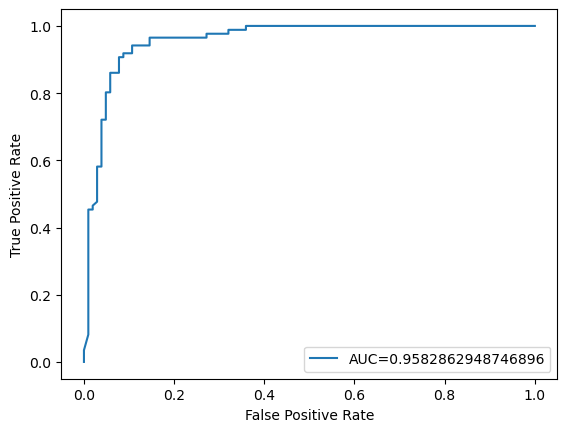

In [80]:
from sklearn import datasets, metrics, model_selection
import matplotlib
matplotlib.rcParams.update(matplotlib.rcParamsDefault)

y_pred_proba = v.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.rcParams['axes.facecolor'] = 'white'
ax.patch.set_edgecolor('black')  
ax.patch.set_linewidth('0.5')  

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [26]:
auc = metrics.roc_auc_score(y_test, y_pred_proba)
auc

0.9582862948746896